In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
pd.set_option('display.max_columns', None)

In [2]:
# geostl nghbd gravois park is 19
# benton park west code is 30
# https://dynamic.stlouis-mo.gov/citydata/newdesign/sqlsearch.cfm
gravois_total_parcels = 1733
benton_park_west_total_parcels = 1693

In [3]:
path = "stl_vacancy_data/*.csv"
csv_list = []
for fname in glob.glob(path):
    csv_list.append(fname)
csv_list

['stl_vacancy_data\\stl_vacancy_data_2021-03-01.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-04-01.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-04-13.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-06-24.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-07-17.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-08-18.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-09-22.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-10-15.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-11-24.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-12-20.csv',
 'stl_vacancy_data\\stl_vacancy_data_2021-12-22.csv',
 'stl_vacancy_data\\stl_vacancy_data_2022-01-23.csv',
 'stl_vacancy_data\\stl_vacancy_data_2022-02-21.csv',
 'stl_vacancy_data\\stl_vacancy_data_2022-03-10.csv',
 'stl_vacancy_data\\stl_vacancy_data_2022-04-23.csv',
 'stl_vacancy_data\\stl_vacancy_data_2022-06-05.csv',
 'stl_vacancy_data\\stl_vacancy_data_2022-06-23.csv',
 'stl_vacancy_data\\stl_vacancy_data_2022-07-17.csv',
 'stl_vacancy_data\\stl_vaca

In [4]:
vac_21_03 = pd.read_csv('stl_vacancy_data/stl_vacancy_data_2021-03-01.csv')
vac_21_03

,Handle,ParcelId,StAddrNum,StNameFull,Zip,Ward10,NhdName,CensTract10,Lat,Lng,Type,ParcelSqFt,OwnerName,OwnerName2,OwnerState,OwnerZip,BldgAge,Vacancy,VacancyCat,Burden,BurdenCat,BoardUp,IsLRA,TaxYrsDel,VacRegMonths,VioMajor,CSBVacancy,CSBNuisance,Forestry,Condemned
0,10076000060,760000600,754,S 4TH ST,63102,7,Downtown,1274.0,38.61840,-90.19150,Commercial,3903,MIDTOWN LOCUST PROPERTIES LLC,NaN,MO,63103.0,128.0,2,Indeterminant,46,Medium,NaN,NaN,1,0,0,True,True,NaN,NaN
1,10181000080,1810000807,777,OLIVE ST,63101,7,Downtown,1256.0,38.62879,-90.19195,Commercial,14282,MORGAN 721 OLIVE LLC,ROBERT C MORGAN,NY,14534.0,125.0,2,Indeterminant,100,Extremely High,NaN,NaN,1,0,1,True,True,NaN,NaN
2,10194000011,1940000110,412,N 9TH ST,63101,7,Downtown,1256.0,38.62999,-90.19266,Commercial,15220,JUBILEE WORLD INC,NaN,MO,63120.0,105.0,2,Indeterminant,12,Very Low,NaN,NaN,0,0,0,True,True,NaN,NaN
3,10245000020,2450000200,1510,N BROADWAY,63102,5,Near North Riverfront,1266.0,38.64002,-90.18558,Commercial,14022,CENTRAL WASTE MATERIAL CO,NaN,MO,63106.0,121.0,2,Indeterminant,15,Very Low,NaN,NaN,0,0,1,True,True,True,NaN
4,10279000010,2790000100,1014,OLIVE ST,63101,7,Downtown,1256.0,38.62907,-90.19552,Other,5920,SAINT PINE LODGING LLC,NaN,IA,52241.0,NaN,2,Indeterminant,0,Zero,NaN,NaN,0,0,0,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21108,15057000230,50570002300,4737,KENSINGTON PL,63108,18,Lewis Place,1123.0,38.65334,-90.25642,Multi-Unit,5508,RIGHT NOW PROPERTY LLC,NaN,MO,63112.0,117.0,100,Very Likely,100,Extremely High,True,NaN,4,0,5,True,True,NaN,NaN
21109,15057000260,50570002600,4745,KENSINGTON PL,63108,18,Lewis Place,1123.0,38.65340,-90.25674,Empty Lot,3505,LRA,NaN,MO,63103.0,NaN,100,Definite,70,Somewhat High,NaN,True,0,0,0,True,NaN,NaN,NaN
21110,15057000270,50570002700,4747,KENSINGTON PL,63108,18,Lewis Place,1123.0,38.65334,-90.25685,Empty Lot,3528,LRA,NaN,MO,63103.0,NaN,100,Definite,70,Somewhat High,NaN,True,0,0,0,NaN,NaN,NaN,NaN
21111,15059050440,50590504400,3961,HARTFORD ST,63116,15,Tower Grove South,1162.0,38.60303,-90.25187,Single-Family,4846,PRIME PORCH LLC,NaN,MO,63011.0,111.0,100,Definite,55,Medium High,True,NaN,2,14,0,NaN,NaN,NaN,NaN


In [5]:
vac_23_11_01 = pd.read_csv('stl_vacancy_data/stl_vacancy_data_2023-11-01.csv')
vac_23_11_01

,Handle,StAddrNum,StNameFull,Zip,Ward20,Ward10,NhdName,CensTract20,CensTract10,Lat,Lng,Type,ParcelSqFt,OwnerName,OwnerName2,OwnerState,OwnerZip,OwnerChange,BldgAge,Vacancy,VacancyCat,Burden,BurdenCat,BoardUp,IsLRA,TaxYrsDel,VacRegMonths,VioMajor,CSBVacancy,CSBNuisance,Forestry,Condemned
0,10233000020,56,MULLANPHY ST,63102,14.0,5,Near North Riverfront,1266.0,1266.0,38.64120,-90.18244,Empty Lot,29421,WIGGINS FERRY COMPANY,C/O CAROLYN SANDHEINRICH,,63103.0,2020-06-10,NaN,10,Indeterminant,0,Zero,NaN,NaN,0,0,0,True,NaN,NaN,NaN
1,10333000020,812,WRIGHT ST,63147,14.0,5,Near North Riverfront,1266.0,1266.0,38.65379,-90.19166,Empty Lot,2652,TNT AUTO CENTER LLC,NaN,MO,63147.0,2020-10-20,NaN,10,Indeterminant,4,Minimal,NaN,NaN,0,0,0,True,True,NaN,NaN
2,10624000080,1408,MONROE ST,63106,14.0,5,Old North St. Louis,1266.0,1266.0,38.64699,-90.19597,Empty Lot,2827,KENDALL DEVELOPMENTS LLC,NaN,MO,63106.0,2019-02-13,NaN,10,Indeterminant,4,Minimal,NaN,NaN,1,0,0,True,NaN,NaN,NaN
3,10663000205,811,ALLEN AV,63104,8.0,7,Soulard,1276.0,1276.0,38.60756,-90.20413,Single-Family,3772,"FIELDS, LESLIE III",NaN,MO,63104.0,2015-11-04,133.0,10,Indeterminant,0,Zero,NaN,NaN,0,0,0,True,NaN,NaN,NaN
4,10690000110,1442,N BROADWAY,63102,14.0,5,Near North Riverfront,1257.0,1257.0,38.63938,-90.18554,Empty Lot,8200,1440 N BROADWAY LLC,NaN,MO,63038.0,1978-06-09,NaN,10,Indeterminant,0,Zero,NaN,NaN,0,0,0,True,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25428,19114000050,408,TERMINAL ROW,63147,13.0,2,North Riverfront,1270.0,1270.0,38.72466,-90.21582,Empty Lot,345255,LRA,NaN,MO,63103.0,2014-02-19,NaN,100,Definite,70,High,NaN,True,0,0,0,NaN,NaN,NaN,NaN
25429,19115000130,9000,HALL ST(R),63147,13.0,2,North Riverfront,1270.0,1270.0,38.72639,-90.21538,Empty Lot,194913,LRA,NaN,MO,63103.0,2014-02-19,NaN,100,Definite,100,Extremely High,NaN,True,0,0,0,NaN,NaN,True,NaN
25430,19116000050,9403,RIVERVIEW DR,63137,13.0,2,Riverview,1270.0,1270.0,38.73324,-90.21580,Empty Lot,697236,RIVERVIEW DEVELOPMENT LLC,NaN,IL,62205.0,2022-07-08,64.0,100,Very Likely,29,Low,NaN,NaN,1,0,0,True,NaN,True,True
25431,19119000390,700,SPRING GARDEN DR,63137,13.0,2,Riverview,1270.0,1270.0,38.74799,-90.19810,Empty Lot,57030,"ARD, TRANESHIA",NaN,GA,30101.0,2023-02-06,NaN,100,Very Likely,20,Low,NaN,NaN,0,0,0,True,True,NaN,NaN


In [6]:
sorted(list(vac_23_11_01['NhdName'].unique()))

['Academy',
 'Baden',
 'Belfontaine/Calvary Cemetery',
 'Benton Park',
 'Benton Park West',
 'Bevo Mill',
 'Botanical Heights',
 'Boulevard Heights',
 'Carondelet',
 'Carr Square',
 'Central West End',
 'Cheltenham',
 'Clayton-Tamm',
 'Clifton Heights',
 'College Hill',
 'Columbus Square',
 'Compton Heights',
 'Covenant Blu-Grand Center',
 'DeBaliviere Place',
 'Downtown',
 'Downtown West',
 'Dutchtown',
 'Ellendale',
 'Fairground Neighborhood',
 'Forest Park South East',
 'Fountain Park',
 'Fox Park',
 'Franz Park',
 'Gravois Park',
 'Greater Ville',
 'Hamilton Heights',
 'Hi-Pointe',
 'Holly Hills',
 'Hyde Park',
 'Jeff Vanderlou',
 'Kings Oak',
 'Kingsway East',
 'Kingsway West',
 'Kosciusko',
 'LaSalle Park',
 'Lafayette Square',
 'Lewis Place',
 'Lindenwood Park',
 'Marine Villa',
 'Mark Twain',
 'Mark Twain I-70 Industrial',
 'McKinley Heights',
 'Midtown',
 'Mount Pleasant',
 'Near North Riverfront',
 'North Hampton',
 'North Pointe',
 'North Riverfront',
 "O'Fallon",
 'Old Nort

In [7]:
ben_grav = vac_23_11_01[(vac_23_11_01['NhdName'] == 'Benton Park West') | (vac_23_11_01['NhdName'] == 'Gravois Park')]
ben_grav

,Handle,StAddrNum,StNameFull,Zip,Ward20,Ward10,NhdName,CensTract20,CensTract10,Lat,Lng,Type,ParcelSqFt,OwnerName,OwnerName2,OwnerState,OwnerZip,OwnerChange,BldgAge,Vacancy,VacancyCat,Burden,BurdenCat,BoardUp,IsLRA,TaxYrsDel,VacRegMonths,VioMajor,CSBVacancy,CSBNuisance,Forestry,Condemned
15,11577000160,3418,MINNESOTA AV,63118,7.0,20,Gravois Park,1241.0,1241.0,38.59381,-90.23439,Single-Family,3141,MISSOURI URBAN DEVELOPMENT LLC,NATHAN COOPER/MANAGER,MO,63111.0,2020-06-23,132.0,10,Indeterminant,0,Zero,NaN,NaN,0,0,0,True,NaN,True,NaN
21,11997000180,2931,CALIFORNIA AV,63118,7.0,9,Benton Park West,1242.0,1242.0,38.60142,-90.22878,Single-Family,3188,"SNIPES, ALEXI",C/O FADIL SYLA,MO,63118.0,2021-10-07,134.0,10,Indeterminant,10,Very Low,NaN,NaN,0,0,0,True,True,True,NaN
100,11582000070,3538,S COMPTON AV,63118,7.0,20,Gravois Park,1164.0,1164.0,38.59175,-90.23715,Duplex,3255,"MUNDY, DOUGLAS G",NaN,MO,63119.0,1994-05-27,114.0,11,Indeterminant,3,Minimal,NaN,NaN,0,0,0,True,True,NaN,NaN
190,11510000240,3315,OREGON AV,63118,7.0,9,Benton Park West,1242.0,1242.0,38.59535,-90.23121,Single-Family,3163,"BONNER, SHIRLEY J",NaN,MO,63118.0,2016-10-24,132.0,12,Indeterminant,58,Medium High,NaN,NaN,1,0,0,True,True,NaN,NaN
191,11617000040,3648,LOUISIANA AV,63118,7.0,20,Gravois Park,1164.0,1164.0,38.58998,-90.23986,Single-Family,3136,"BALDERAS, IVAN ISRAEL TORRES",NaN,MO,63157.0,2015-12-17,131.0,12,Indeterminant,0,Zero,NaN,NaN,0,0,1,True,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11783,11997000170,2929,CALIFORNIA AV,63118,7.0,9,Benton Park West,1242.0,1242.0,38.60148,-90.22876,Duplex,3188,"CRAWFORD, RITCHIE E SR",NaN,MO,63136.0,1998-03-03,131.0,100,Definite,100,Extremely High,NaN,NaN,4,76,7,True,True,True,NaN
11790,12058000060,3000,CALIFORNIA AV,63118,7.0,9,Benton Park West,1242.0,1242.0,38.60108,-90.22818,Multi-Unit,4615,YKKL INVESTMENTS LLC,NaN,CA,92620.0,1983-12-21,110.0,100,Definite,39,Medium Low,NaN,NaN,0,69,8,True,True,True,NaN
11791,12058000160,2743,ARSENAL ST,63118,7.0,9,Benton Park West,1242.0,1242.0,38.60024,-90.22798,Duplex,3129,"PESEK, JOSEPH & LOUISE",C/O GLORIA J BUSCHMANN,MO,63118.0,2021-07-29,133.0,100,Definite,100,Extremely High,NaN,NaN,4,2,6,True,True,NaN,NaN
11795,12070000010,2615,LYNCH ST,63118,7.0,9,Benton Park West,1231.0,1231.0,38.60343,-90.22424,Empty Lot,4356,LRA,NaN,MO,63103.0,2014-03-20,NaN,100,Definite,73,High,NaN,True,0,0,0,NaN,True,NaN,NaN


array([[<Axes: title={'center': 'Handle'}>,
        <Axes: title={'center': 'StAddrNum'}>,
        <Axes: title={'center': 'Zip'}>,
        <Axes: title={'center': 'Ward20'}>],
       [<Axes: title={'center': 'Ward10'}>,
        <Axes: title={'center': 'CensTract20'}>,
        <Axes: title={'center': 'CensTract10'}>,
        <Axes: title={'center': 'Lat'}>],
       [<Axes: title={'center': 'Lng'}>,
        <Axes: title={'center': 'ParcelSqFt'}>,
        <Axes: title={'center': 'OwnerZip'}>,
        <Axes: title={'center': 'BldgAge'}>],
       [<Axes: title={'center': 'Vacancy'}>,
        <Axes: title={'center': 'Burden'}>,
        <Axes: title={'center': 'TaxYrsDel'}>,
        <Axes: title={'center': 'VacRegMonths'}>],
       [<Axes: title={'center': 'VioMajor'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

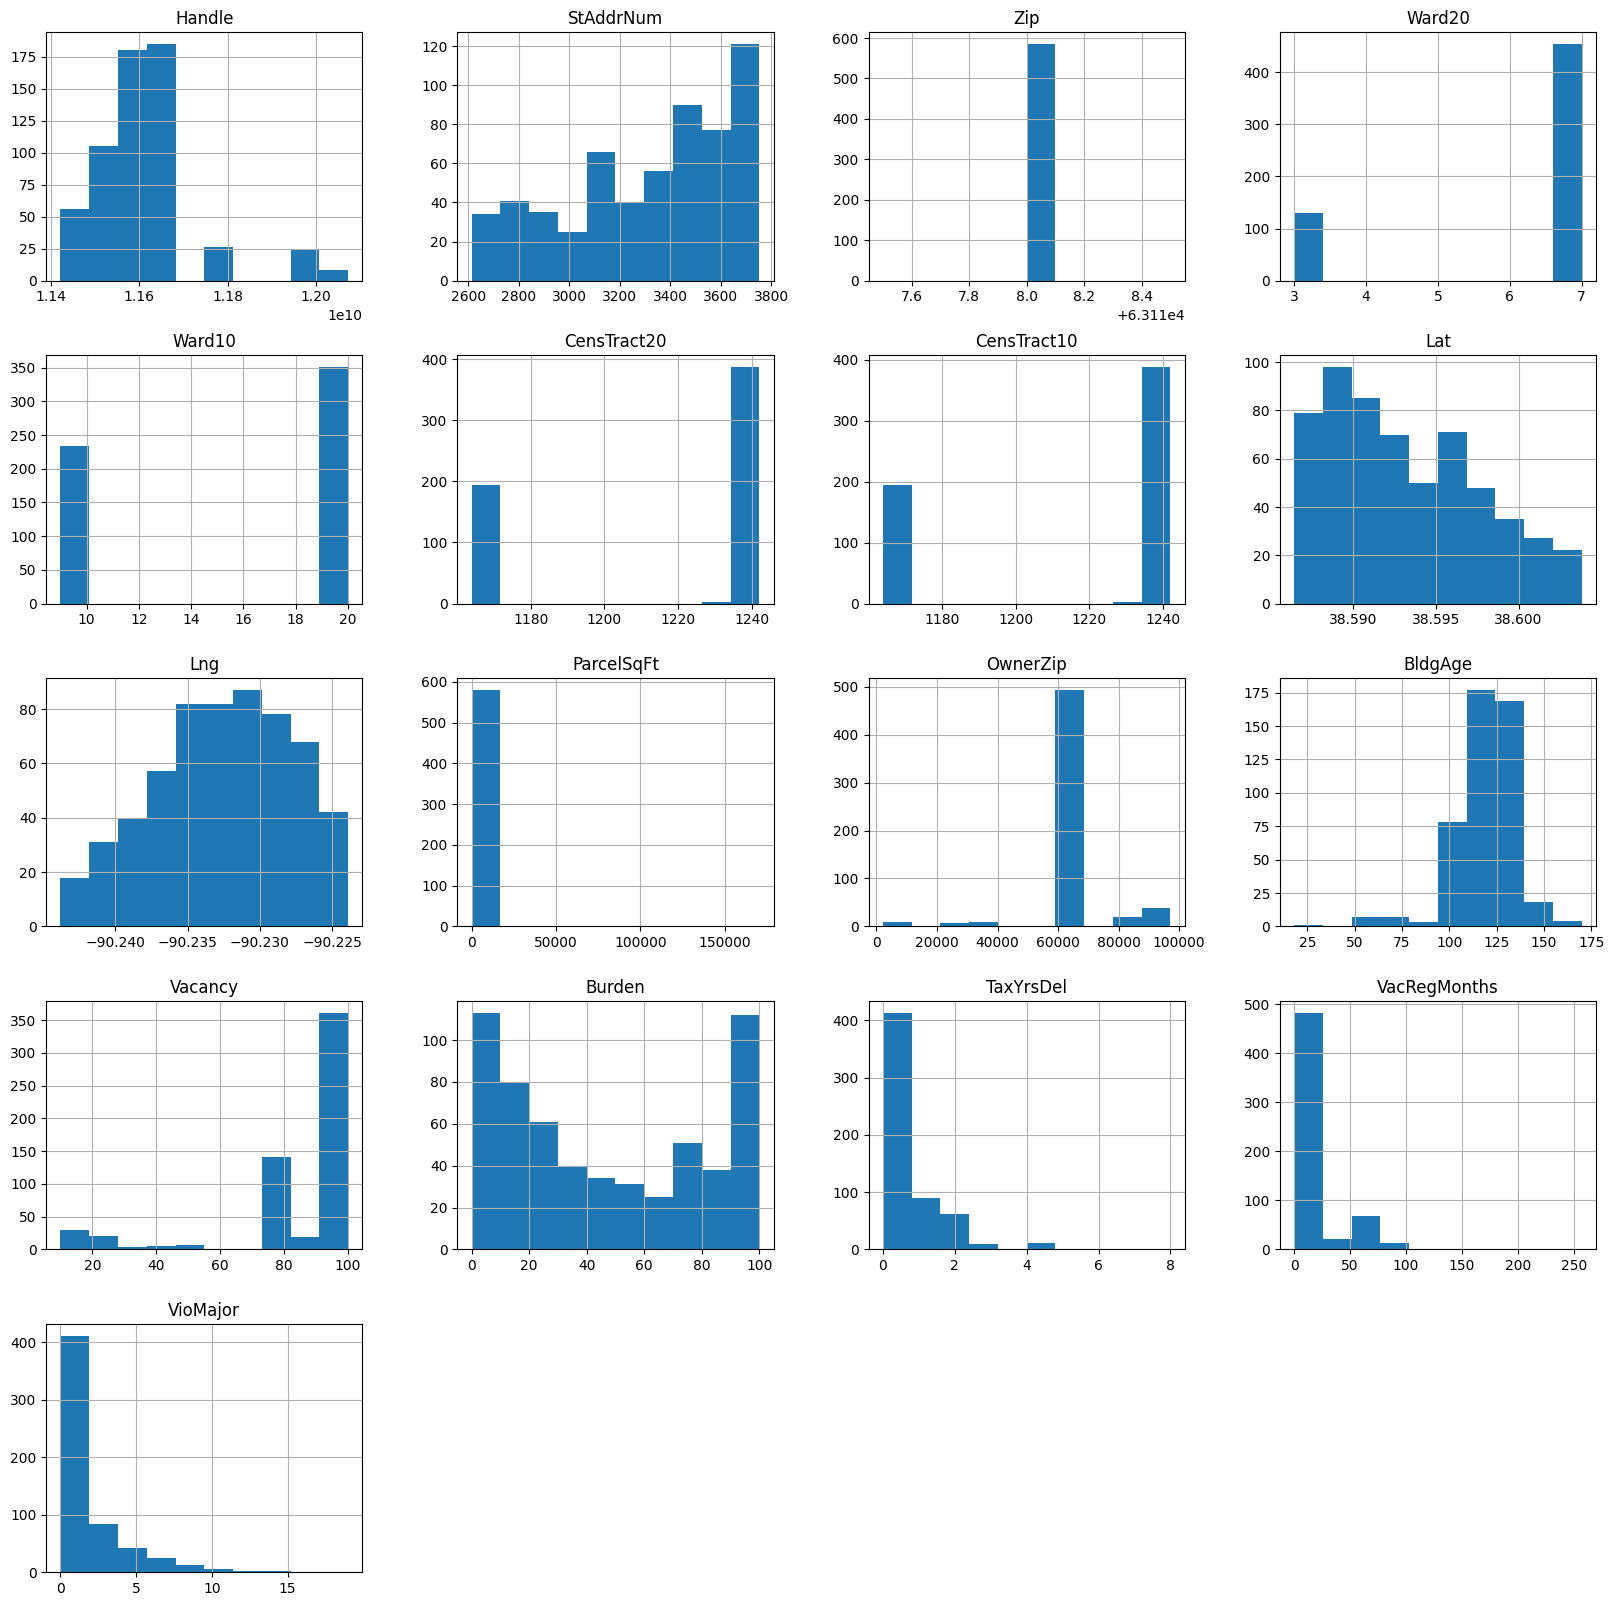

In [8]:
ben_grav.hist(figsize=(20,20))

In [9]:
gg = ben_grav['VacancyCat'].value_counts().to_frame().transpose()
gg

VacancyCat,Definite,Very Likely,Indeterminant,Possible
count,300,221,50,14


In [10]:
zz = zip(ben_grav['VacancyCat'].value_counts().index.to_list(), ben_grav['VacancyCat'].value_counts().to_list())
list(zz)

[('Definite', 300),
 ('Very Likely', 221),
 ('Indeterminant', 50),
 ('Possible', 14)]

In [11]:
ben_grav['BurdenCat'].value_counts()

BurdenCat
Extremely High    112
Very Low           80
Minimal            75
Low                61
High               51
Medium Low         40
Zero               38
Very High          38
Medium             34
Medium High        31
Somewhat High      25
Name: count, dtype: int64

In [12]:
ben_grav[['Burden','BurdenCat']][ben_grav['Burden'] ==91]

,Burden,BurdenCat
11030,91,Extremely High
11212,91,Extremely High


In [13]:
aa = ben_grav.groupby('Type')['VacancyCat'].value_counts()
# aa.to_csv('sample.csv')
bb = aa.to_frame().unstack()
bb.columns = bb.columns.droplevel()
bb.columns.name
bb.index.name

'Type'

In [14]:
aa = ben_grav.groupby('Type')['VacancyCat'].value_counts().to_frame().unstack()
aa.columns = aa.columns.droplevel()
aa = aa[['Indeterminant', 'Possible', 'Very Likely', 'Definite']]
aa

VacancyCat,Indeterminant,Possible,Very Likely,Definite
Type,,,,
Commercial,3.0,2.0,8.0,3.0
Duplex,12.0,4.0,37.0,89.0
Empty Lot,7.0,1.0,80.0,51.0
Mixed-Use,3.0,NaN,4.0,4.0
Multi-Unit,3.0,2.0,20.0,41.0
Single-Family,22.0,5.0,72.0,112.0


In [15]:
bb = ben_grav.groupby('Type')['BurdenCat'].value_counts().to_frame().unstack()
bb.columns = bb.columns.droplevel()
# bb = bb[['Zero', 'Minimal', 'Very Low', 'Low', 'Medium Low', 'Medium', 'Medium High', 'Somewhat High', 'High', 'Very High', 'Extremely High']]
bb.fillna(value=0, inplace=True)
bb['B_Low'] = bb['Very Low'] + bb['Low'] + bb['Medium Low']
bb.reset_index(inplace=True)
bb

BurdenCat,Type,Extremely High,High,Low,Medium,Medium High,Medium Low,Minimal,Somewhat High,Very High,Very Low,Zero,B_Low
0,Commercial,7.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,6.0
1,Duplex,39.0,5.0,12.0,10.0,15.0,14.0,11.0,5.0,11.0,14.0,6.0,40.0
2,Empty Lot,7.0,34.0,12.0,1.0,1.0,4.0,30.0,1.0,9.0,28.0,12.0,44.0
3,Mixed-Use,6.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,Multi-Unit,17.0,2.0,4.0,5.0,7.0,5.0,10.0,6.0,5.0,5.0,0.0,14.0
5,Single-Family,36.0,10.0,28.0,16.0,8.0,16.0,23.0,12.0,12.0,32.0,18.0,76.0


In [16]:
pd.read_csv('sample.csv')

,Type,Definite,Indeterminant,Possible,Very Likely
0,Commercial,3.0,3.0,2.0,8.0
1,Duplex,89.0,12.0,4.0,37.0
2,Empty Lot,51.0,7.0,1.0,80.0
3,Mixed-Use,4.0,3.0,NaN,4.0
4,Multi-Unit,41.0,3.0,2.0,20.0
5,Single-Family,112.0,22.0,5.0,72.0


In [17]:
csv_list[0]
re.findall(r'stl_vacancy_data_\d\d\d\d-\d\d-\d\d.csv', csv_list[0])[0]

'stl_vacancy_data_2021-03-01.csv'

In [18]:
csv_folder = 'stl_vacancy_data/'
path = "stl_vacancy_data/*.csv"
csv_list = []
vacancy_cat_df = pd.DataFrame(columns=['Date', 'V_Indeterminate', 'V_Possible', 'V_Very_likely', 'V_Definite'])
burden_cat_df = pd.DataFrame(columns=['Date', 'B_Zero', 'B_Low', 'B_Medium', 'B_High'])

for fname in glob.glob(path):
    csv_name = re.findall(r'stl_vacancy_data_\d\d\d\d-\d\d-\d\d.csv', fname)[0]
    csv_list.append(csv_name)

In [19]:
class VacancyTransformer():
    def __init__(self, csv_name):
        self.date = re.findall(r'\d\d\d\d-\d\d-\d\d', csv_name)[0]
        self.csv_name = csv_name
        
    def load_raw_df(self):
        self.raw_df = pd.read_csv(csv_folder+self.csv_name)
        return self.raw_df

    def create_regional_df(self):
        self.df = self.raw_df[(self.raw_df['NhdName'] == 'Benton Park West') | (self.raw_df['NhdName'] == 'Gravois Park')]
        return self.df
    def calc_vacancy_cats(self, df):
        counts = df['VacancyCat'].value_counts()
        data = [self.date] + counts[['Indeterminant', 'Possible', 'Very Likely', 'Definite']].tolist()
        
        vacancy_cat_df.loc[len(vacancy_cat_df.index)] = data

    def calc_burden_cats(self, df):
        counts = df['BurdenCat'].value_counts()
        zero_cat = counts['Zero']
        low_cat = sum(counts[['Minimal', 'Very Low', 'Low']])
        med_cat = sum(counts[['Medium Low', 'Medium', 'Medium High', 'Somewhat High']])
        high_cat = sum(counts[['High', 'Very High', 'Extremely High']])
        
        burden_cat_df.loc[len(burden_cat_df.index)] = [self.date, zero_cat, low_cat, med_cat, high_cat]

    def calc_groupby_counts(self, df, cat_list, region):
        
        valid = {'stl','grav-jeff'}
        if region not in valid:
            raise ValueError("results: status must be one of %r." % valid)
        
        for cat in cat_list:
            
            # VacancyCat:
            vac_df = df.groupby(cat)['VacancyCat'].value_counts().to_frame().unstack()
            vac_df.columns = vac_df.columns.droplevel()
            vac_df.fillna(value=0, inplace=True)
            vac_value_name = vac_df.columns.name
            vac_index_name = vac_df.index.name
            vac_df = vac_df[['Indeterminant', 'Possible', 'Very Likely', 'Definite']]
            vac_df.rename(columns={'Indeterminant': 'V_Indeterminant',
                               'Possible': 'V_Possible',
                               'Very Likely': 'V_Very_Likely',
                               'Definite': 'V_Definite'},
                          inplace=True)
            vac_df.reset_index(inplace=True)
            vac_df.insert(loc=0, column='Date', value=self.date)
            vac_df.to_csv(f'data/temp/type_vacancy_data/{region}_{vac_index_name}_{vac_value_name}_{self.date}.csv')

            # BurdenCat
            bur_df =  df.groupby(cat)['BurdenCat'].value_counts().to_frame().unstack()
            bur_df.columns = bur_df.columns.droplevel()
            bur_df.fillna(value=0, inplace=True)
            bur_index_name = bur_df.index.name
            bur_value_name = bur_df.columns.name
            bur_df['B_Zero'] = bur_df['Zero']
            bur_df['B_Low'] = bur_df['Minimal'] + bur_df['Very Low'] + bur_df['Low']
            bur_df['B_Medium'] = bur_df['Medium Low'] + bur_df['Medium'] + bur_df['Medium High'] + bur_df['Somewhat High']
            bur_df['B_High'] = bur_df['High'] + bur_df['Very High'] + bur_df['Extremely High']
            bur_df.reset_index(inplace=True)
            bur_df.insert(loc=0, column='Date', value=self.date)
            bur_df = bur_df[['Date', 'Type', 'B_Zero', 'B_Low', 'B_Medium', 'B_High']]
            bur_df.to_csv(f'data/temp/type_burden_data/{region}_{bur_index_name}_{bur_value_name}_{self.date}.csv')

In [20]:
d = VacancyTransformer(csv_list[0])

In [21]:
for csv in csv_list:
    d = VacancyTransformer(csv)
    d.load_raw_df()
    gj_df = d.create_regional_df()
    d.calc_vacancy_cats(df=gj_df)
    d.calc_burden_cats(df=gj_df)
    d.calc_groupby_counts(df=gj_df, cat_list=['Type'], region='grav-jeff')

In [22]:
vacancy_cat_df

,date,indeterminate,possible,very_likely,definite
0,2021-03-01,112,36,362,220
1,2021-04-01,83,6,252,186
2,2021-04-13,82,6,441,222
3,2021-06-24,46,5,408,221
4,2021-07-17,45,6,406,221
5,2021-08-18,46,5,406,221
6,2021-09-22,49,6,408,221
7,2021-10-15,50,6,412,221
8,2021-11-24,49,6,417,220
9,2021-12-20,49,6,418,220


In [23]:
vacancy_cat_df

,date,indeterminate,possible,very_likely,definite
0,2021-03-01,112,36,362,220
1,2021-04-01,83,6,252,186
2,2021-04-13,82,6,441,222
3,2021-06-24,46,5,408,221
4,2021-07-17,45,6,406,221
5,2021-08-18,46,5,406,221
6,2021-09-22,49,6,408,221
7,2021-10-15,50,6,412,221
8,2021-11-24,49,6,417,220
9,2021-12-20,49,6,418,220


In [25]:
burden_cat_df.to_csv('data/temp/grav-jeff_burden.csv')

In [26]:
vacancy_cat_df.to_csv('data/temp/grav-jeff_vacancy.csv')

In [27]:
path = "data/temp/type_burden_data/Gravois-Jefferson/*.csv"
burden_list = []
for fname in glob.glob(path):
    df = pd.read_csv(fname, index_col=0)
    burden_list.append(df)
grav_jeff_type_burden_all = pd.concat(burden_list, ignore_index=True)
grav_jeff_type_burden_all.to_csv('data/grav_jeff_type_burden_all.csv')

In [28]:
path = "data/temp/type_vacancy_data/Gravois-Jefferson/*.csv"
vacancy_list = []
for fname in glob.glob(path):
    df = pd.read_csv(fname, index_col=0)
    vacancy_list.append(df)
grav_jeff_type_vacancy_all = pd.concat(vacancy_list, ignore_index=True)
grav_jeff_type_vacancy_all.to_csv('data/grav_jeff_type_vacancy_all.csv')
grav_jeff_type_vacancy_all

,Date,Type,V_Indeterminant,V_Possible,V_Very_Likely,V_Definite
0,2021-03-01,Commercial,5.0,2.0,21.0,4.0
1,2021-03-01,Duplex,32.0,5.0,103.0,54.0
2,2021-03-01,Empty Lot,14.0,5.0,57.0,54.0
3,2021-03-01,Multi-Unit,7.0,0.0,33.0,30.0
4,2021-03-01,Other,4.0,1.0,7.0,8.0
...,...,...,...,...,...,...
157,2023-11-01,Duplex,12.0,4.0,37.0,89.0
158,2023-11-01,Empty Lot,7.0,1.0,80.0,51.0
159,2023-11-01,Mixed-Use,3.0,0.0,4.0,4.0
160,2023-11-01,Multi-Unit,3.0,2.0,20.0,41.0


In [29]:
csv_list

['stl_vacancy_data_2021-03-01.csv',
 'stl_vacancy_data_2021-04-01.csv',
 'stl_vacancy_data_2021-04-13.csv',
 'stl_vacancy_data_2021-06-24.csv',
 'stl_vacancy_data_2021-07-17.csv',
 'stl_vacancy_data_2021-08-18.csv',
 'stl_vacancy_data_2021-09-22.csv',
 'stl_vacancy_data_2021-10-15.csv',
 'stl_vacancy_data_2021-11-24.csv',
 'stl_vacancy_data_2021-12-20.csv',
 'stl_vacancy_data_2021-12-22.csv',
 'stl_vacancy_data_2022-01-23.csv',
 'stl_vacancy_data_2022-02-21.csv',
 'stl_vacancy_data_2022-03-10.csv',
 'stl_vacancy_data_2022-04-23.csv',
 'stl_vacancy_data_2022-06-05.csv',
 'stl_vacancy_data_2022-06-23.csv',
 'stl_vacancy_data_2022-07-17.csv',
 'stl_vacancy_data_2022-08-11.csv',
 'stl_vacancy_data_2022-09-13.csv',
 'stl_vacancy_data_2022-10-18.csv',
 'stl_vacancy_data_2022-11-17.csv',
 'stl_vacancy_data_2022-12-26.csv',
 'stl_vacancy_data_2023-03-28.csv',
 'stl_vacancy_data_2023-04-22.csv',
 'stl_vacancy_data_2023-05-02.csv',
 'stl_vacancy_data_2023-11-01.csv']

In [30]:
vacancy_cat_df = pd.DataFrame(columns=['Date', 'V_Indeterminate', 'V_Possible', 'V_Very_likely', 'V_Definite'])
burden_cat_df = pd.DataFrame(columns=['Date', 'B_Zero', 'B_Low', 'B_Medium', 'B_High'])
for csv in csv_list:
    d = VacancyTransformer(csv)
    stl_df = d.load_raw_df()
    
    d.calc_vacancy_cats(df=stl_df)
    d.calc_burden_cats(df=stl_df)
    d.calc_groupby_counts(df=stl_df, cat_list=['Type'], region='stl')

In [32]:
burden_cat_df

,Date,B_Zero,B_Low,B_Medium,B_High
0,2021-03-01,1079,6317,4102,9615
1,2021-04-01,3084,4795,2941,12042
2,2021-04-13,4628,6316,3092,12638
3,2021-06-24,3553,6299,2589,13722
4,2021-07-17,3499,6336,2608,13755
5,2021-08-18,3557,6384,2670,13790
6,2021-09-22,3573,6429,2708,13813
7,2021-10-15,3566,6466,2722,13810
8,2021-11-24,3575,6493,2738,13827
9,2021-12-20,3500,6466,2731,13828


In [33]:
vacancy_cat_df.to_csv('data/temp/stl_vacancy.csv')
burden_cat_df.to_csv('data/temp/stl_burden.csv')

In [36]:
path = "data/temp/type_burden_data/STL/*.csv"
burden_list = []
for fname in glob.glob(path):
    df = pd.read_csv(fname, index_col=0)
    burden_list.append(df)
stl_type_burden_all = pd.concat(burden_list, ignore_index=True)
stl_type_burden_all.to_csv('data/stl_type_burden_all.csv')

In [34]:
path = "data/temp/type_vacancy_data/STL/*.csv"
vacancy_list = []
for fname in glob.glob(path):
    df = pd.read_csv(fname, index_col=0)
    vacancy_list.append(df)
stl_type_vacancy_all = pd.concat(vacancy_list, ignore_index=True)
stl_type_vacancy_all.to_csv('data/stl_type_vacancy_all.csv')
stl_type_vacancy_all

,Date,Type,V_Indeterminant,V_Possible,V_Very_Likely,V_Definite
0,2021-03-01,Commercial,254.0,136.0,398.0,225.0
1,2021-03-01,Duplex,364.0,141.0,833.0,1365.0
2,2021-03-01,Empty Lot,578.0,217.0,4349.0,5706.0
3,2021-03-01,Multi-Unit,91.0,48.0,202.0,393.0
4,2021-03-01,Other,170.0,62.0,246.0,248.0
...,...,...,...,...,...,...
183,2023-11-01,Empty Lot,381.0,65.0,6706.0,8756.0
184,2023-11-01,Mixed-Use,20.0,2.0,43.0,63.0
185,2023-11-01,Multi-Unit,84.0,19.0,169.0,496.0
186,2023-11-01,Other,0.0,1.0,3.0,0.0
